In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

In [3]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten

from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomTranslation

In [5]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

In [6]:
train_data_dir = "C:/Users/naimu/OneDrive/Desktop/COSC 4337/project/batch1_processedV2"
image_size = (50, 50)

dataset = image_dataset_from_directory(
    train_data_dir,
    image_size=image_size,
)

Found 300 files belonging to 6 classes.


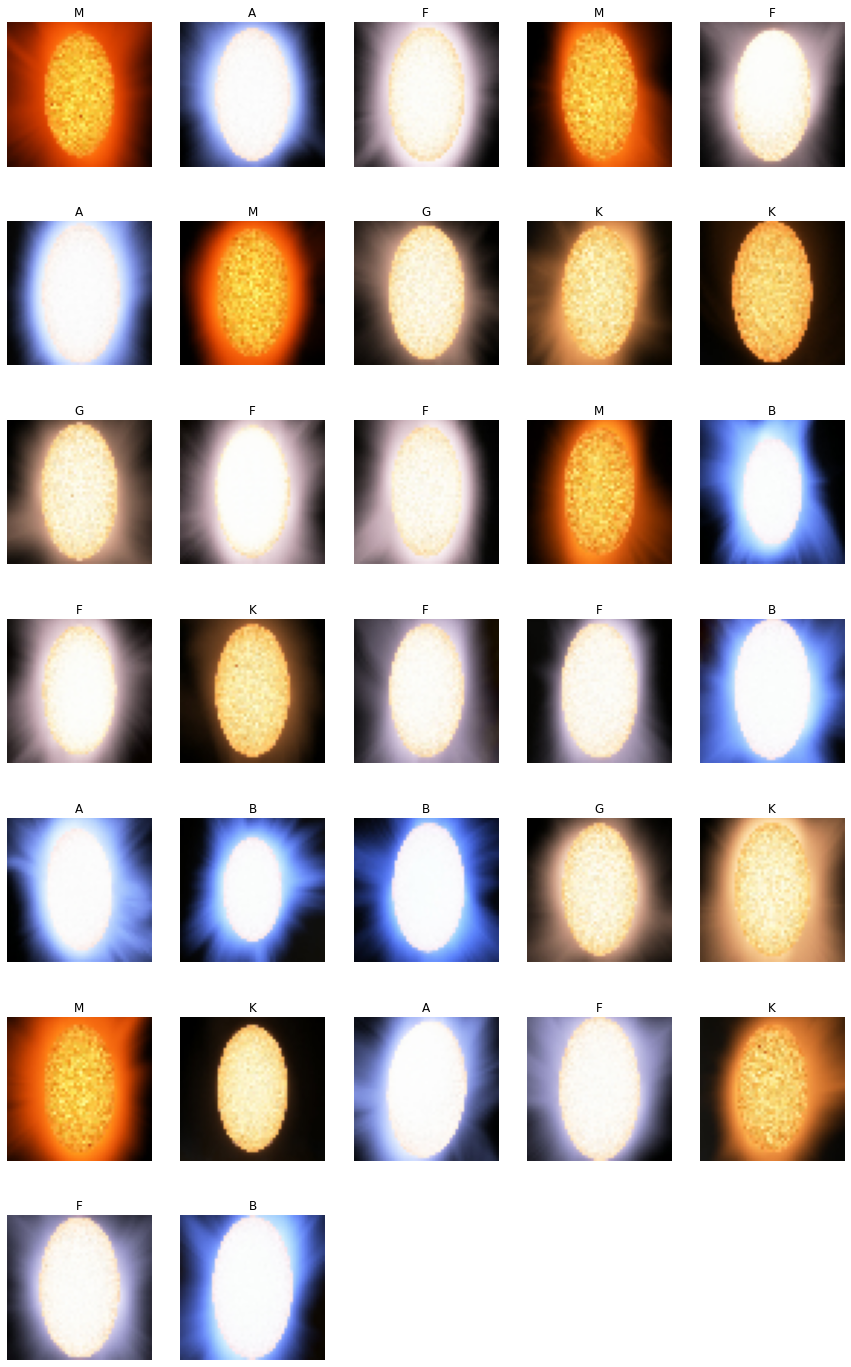

In [7]:
plt.figure(figsize=(15, 25))
class_names = dataset.class_names
for images, labels in dataset.take(1):
    for i in range(32):
        plt.subplot(7, 5, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
train_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    seed=1,
    subset="training",
    label_mode="categorical",
    image_size=image_size
)

validation_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    seed=1,
    subset="validation",
    label_mode="categorical",
    image_size=image_size
)

Found 300 files belonging to 6 classes.
Using 240 files for training.
Found 300 files belonging to 6 classes.
Using 60 files for validation.


In [9]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom((-0.1,0.1)),
    RandomContrast(0.05),  
    RandomTranslation(0.1,0.1)
])

In [14]:
model = Sequential()
model.add(InputLayer(input_shape=(50, 50, 3)))
model.add(data_augmentation)
model.add(Rescaling(scale=1./255))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Dense(2, activation='softmax', kernel_initializer=tf.keras.initializers.Constant(0.01)))
model.add(Dense(6, activation='softmax'))
# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [16]:
history = model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=30,
    verbose=1)

Epoch 1/30
8/8 [==============================] - 1s 137ms/step - loss: 0.8797 - accuracy: 0.6167 - val_loss: 0.7836 - val_accuracy: 0.8000
Epoch 2/30
8/8 [==============================] - 1s 137ms/step - loss: 0.8744 - accuracy: 0.5875 - val_loss: 0.7780 - val_accuracy: 0.6667
Epoch 3/30
8/8 [==============================] - 1s 136ms/step - loss: 0.8586 - accuracy: 0.6125 - val_loss: 0.7859 - val_accuracy: 0.7833
Epoch 4/30
8/8 [==============================] - 1s 136ms/step - loss: 0.8416 - accuracy: 0.6292 - val_loss: 0.7140 - val_accuracy: 0.7000
Epoch 5/30
8/8 [==============================] - 1s 139ms/step - loss: 0.8207 - accuracy: 0.6250 - val_loss: 0.7519 - val_accuracy: 0.8000
Epoch 6/30
8/8 [==============================] - 1s 136ms/step - loss: 0.8012 - accuracy: 0.6542 - val_loss: 0.6826 - val_accuracy: 0.8667
Epoch 7/30
8/8 [==============================] - 1s 135ms/step - loss: 0.7720 - accuracy: 0.6625 - val_loss: 0.7000 - val_accuracy: 0.7500
Epoch 8/30
8/8 [====